# ch2.[실습 1] 학습 데이터 전체 실습

### Key Point
    - 데이터 유형에 따른 데이터 로드 및 데이터 확인
    - Data Sampling 실습
    - Class Imbalance 처리 알고리즘 실습

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from IPython.display import Image
from datetime import datetime

# library for statistic
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import boxcox, norm
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats.mstats import kruskal
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import RandomizedSearchCV

# library for sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN

# library for machine learning
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

from xgboost import XGBClassifier
from xgboost import plot_importance

## 1. Data 유형 확인

In [ ]:
!pwd
path_lecture = "/content/data"
random_state = 1234

/content


#### 1) 정형 데이터 확인

In [ ]:
df = pd.read_csv("/content/data/winequality.csv")
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [ ]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

#### 2) 반정형 데이터 확인
- 쉽게 데이터 추가 & 변형 가능 특성 보임 (정형과는 다르게 처리)

In [ ]:
import json

# 샘플 JSON 데이터
data_str = """{
    "employees": [
        {"name": "Alice", "age": 28, "occupation": "Engineer"},
        {"name": "Bob", "age": 24, "occupation": "Data Scientist"},
        {"name": "Charlie", "age": 22, "occupation": "Designer"}
    ]
}"""

data = json.loads(data_str)

for employee in data["employees"]:
  print(employee)

{'name': 'Alice', 'age': 28, 'occupation': 'Engineer'}
{'name': 'Bob', 'age': 24, 'occupation': 'Data Scientist'}
{'name': 'Charlie', 'age': 22, 'occupation': 'Designer'}


In [ ]:
# 수익 데이터 추가
data["employees"][0]["income"] = 10000

In [ ]:
data["employees"][0]

{'name': 'Alice', 'age': 28, 'occupation': 'Engineer', 'income': 10000}

In [ ]:
data["employees"][1]

{'name': 'Bob', 'age': 24, 'occupation': 'Data Scientist'}

#### 3) 비정형 데이터 확인

In [ ]:
from PIL import Image

In [ ]:
img = Image.open(path_lecture + "/dog_sample_image.jpeg")

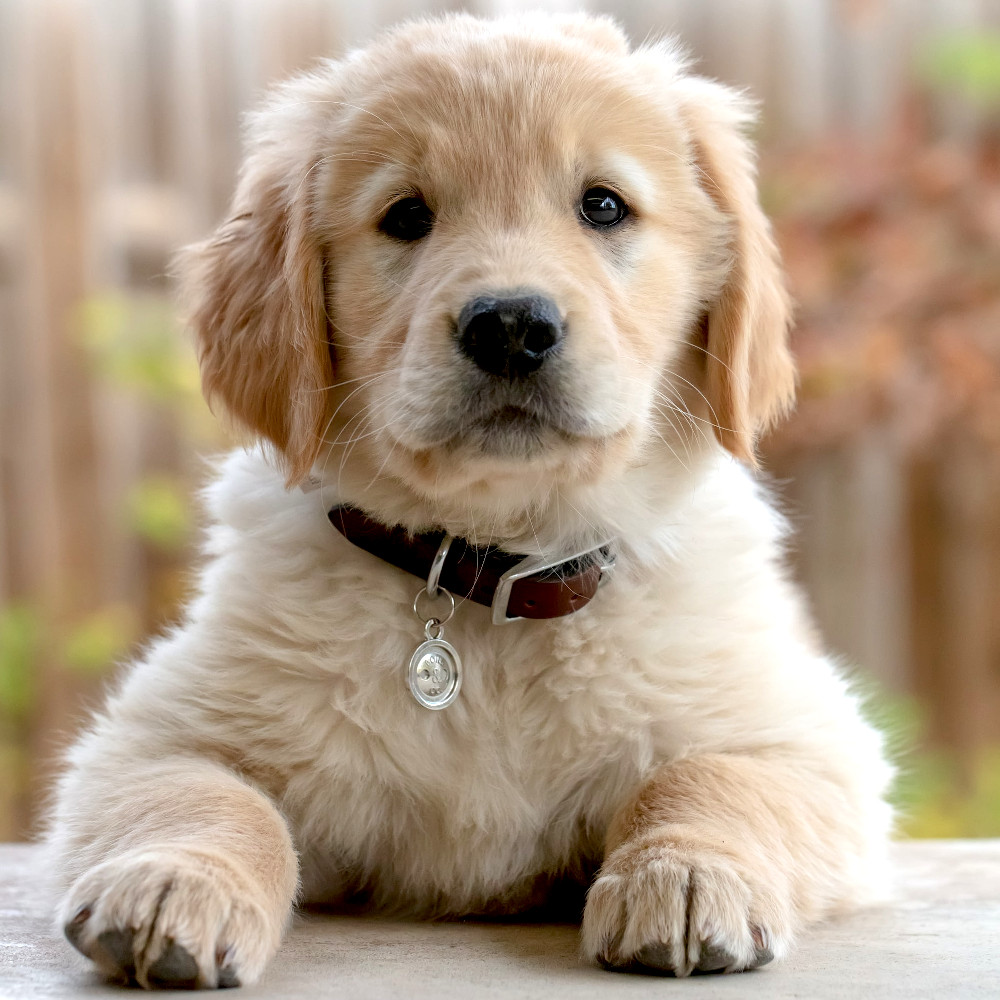

In [ ]:
img

In [ ]:
# 1. 이미지 상하반전
flipped_image = img.transpose(Image.FLIP_TOP_BOTTOM)

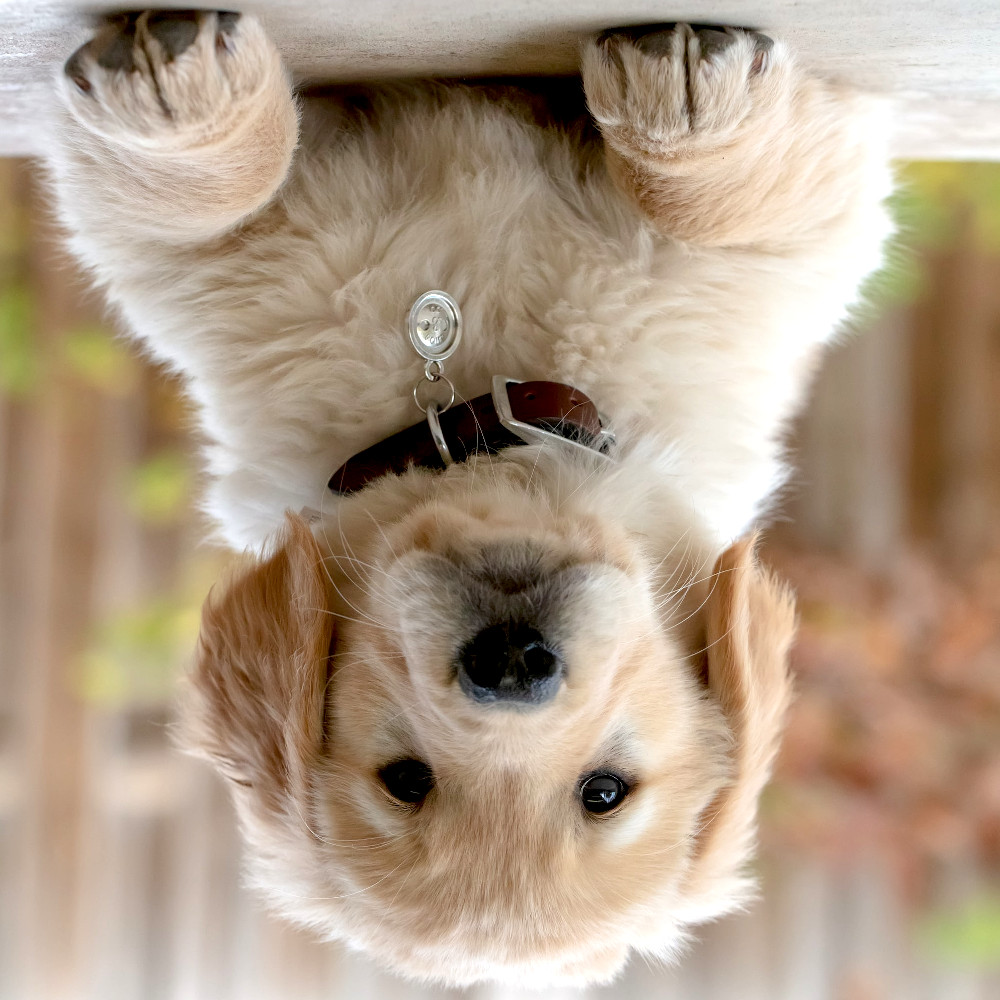

In [ ]:
flipped_image

In [ ]:
# 2. 이미지 좌우반전
mirrored_image = img.transpose(Image.FLIP_LEFT_RIGHT)

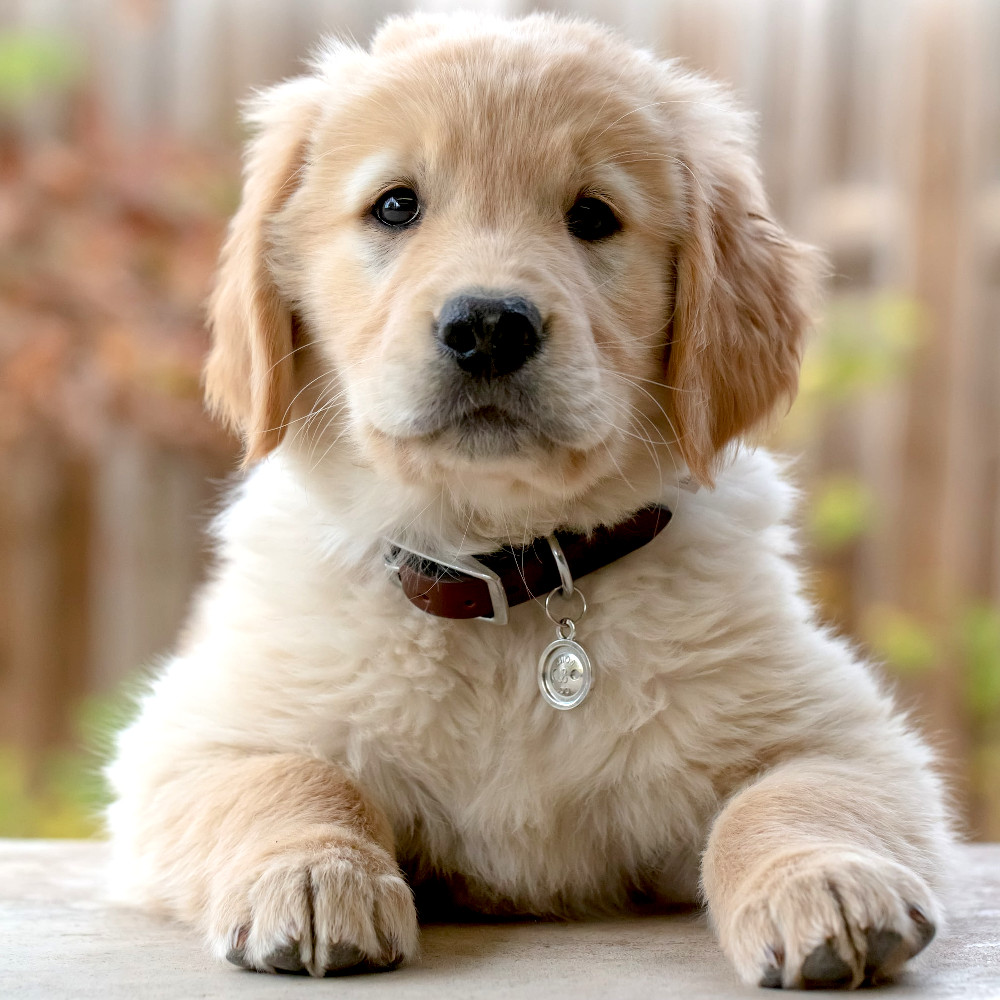

In [ ]:
mirrored_image

In [ ]:
# 이미지 축소 (반으로 축소)
width, height = img.size
shrinked_image = img.resize((width//2, height//2))

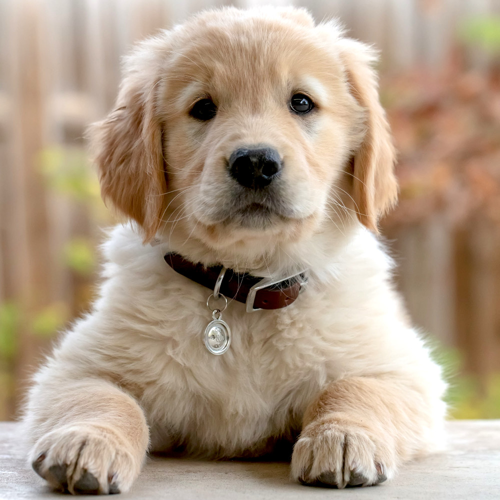

In [ ]:
shrinked_image

## 2. Data Sampling

In [ ]:
# 가상의 데이터 생성
data = pd.DataFrame({
    'Age': np.random.randint(20, 40, 100),
    'Income': np.random.randint(50000, 100000, 100)
})

In [ ]:
data.head(10)

Age  Income
0   22   58761
1   22   73331
2   35   94744
3   38   78838
4   27   83163
5   21   89584
6   27   60887
7   29   86602
8   23   86230
9   38   50204

#### 1) Random Sampling

In [ ]:
# 무작위로 10개의 데이터 선택
random_samples = data.sample(n=10)
print(random_samples)

    Age  Income
74   26   59448
53   20   94534
28   29   55876
77   33   76667
89   28   80930
64   27   76619
66   32   68843
9    38   50204
81   26   74763
12   31   76726


#### 2) Stratified Sampling

In [ ]:
# 'Age' 컬럼을 기준으로 층화 샘플링
from sklearn.model_selection import train_test_split

stratified_samples = train_test_split(data, test_size=0.2, stratify=data['Age'])


#### 3) Cluster Sampling


In [ ]:
# 클러스터 생성을 위해 'Age'를 기준으로 데이터 분할
data['cluster'] = pd.cut(data['Age'], bins=[20, 25, 30, 35, 40], labels=['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4'])

# 무작위로 클러스터 선택
selected_cluster = np.random.choice(data['cluster'].unique())

cluster_samples = data[data['cluster'] == selected_cluster]
print(cluster_samples)


    Age  Income    cluster
4    27   83163  cluster_2
6    27   60887  cluster_2
7    29   86602  cluster_2
13   26   73510  cluster_2
15   29   77944  cluster_2
16   29   93016  cluster_2
17   29   97793  cluster_2
21   27   99206  cluster_2
22   26   75510  cluster_2
24   28   91792  cluster_2
28   29   55876  cluster_2
32   26   54105  cluster_2
35   26   80570  cluster_2
39   29   55181  cluster_2
44   30   66197  cluster_2
46   28   76747  cluster_2
49   29   83820  cluster_2
57   30   54263  cluster_2
59   29   82640  cluster_2
64   27   76619  cluster_2
68   26   70052  cluster_2
70   29   65476  cluster_2
74   26   59448  cluster_2
75   28   50444  cluster_2
80   26   50037  cluster_2
81   26   74763  cluster_2
83   27   71844  cluster_2
87   27   58312  cluster_2
88   27   63498  cluster_2
89   28   80930  cluster_2
90   29   53097  cluster_2
93   26   59137  cluster_2
94   28   94466  cluster_2
96   30   55918  cluster_2
99   29   70925  cluster_2


#### 4) Weight Sampling


In [ ]:
weights = np.random.rand(len(data))
weights

array([0.31193472, 0.99323996, 0.00589024, 0.17529359, 0.17703006,
       0.9016437 , 0.91606782, 0.78236676, 0.66922993, 0.50927065,
       0.15250012, 0.25476686, 0.19166226, 0.40502464, 0.87154083,
       0.23673205, 0.13553792, 0.52084019, 0.65656254, 0.2771049 ,
       0.45383201, 0.34498739, 0.51739211, 0.59725047, 0.21157089,
       0.38484725, 0.4326052 , 0.10429817, 0.95738168, 0.33239124,
       0.14617439, 0.67223332, 0.21237617, 0.1655018 , 0.0368147 ,
       0.6698801 , 0.88990696, 0.31413743, 0.35583833, 0.98296924,
       0.79983909, 0.34963608, 0.28806036, 0.61339028, 0.10456236,
       0.30194197, 0.59674298, 0.8754892 , 0.36171561, 0.20762644,
       0.07916603, 0.12887141, 0.26058108, 0.87323034, 0.94377812,
       0.33113753, 0.19474355, 0.80966933, 0.20249596, 0.39756505,
       0.20199028, 0.96092855, 0.32197185, 0.58525113, 0.17464469,
       0.88353701, 0.84527425, 0.94813832, 0.78426172, 0.50031689,
       0.34054198, 0.16748234, 0.37177703, 0.32300192, 0.16826

In [ ]:
weight_samples = data.sample(n=10, weights=weights)
print(weight_samples)

    Age  Income    cluster
15   29   77944  cluster_2
20   38   81856  cluster_4
13   26   73510  cluster_2
79   35   79986  cluster_3
6    27   60887  cluster_2
57   30   54263  cluster_2
14   32   53966  cluster_3
58   22   63578  cluster_1
55   20   85096        NaN
39   29   55181  cluster_2


#### 5) Importance Sampling

In [ ]:
# 가중치 샘플링의 특별한 경우로, 특정 함수의 기대값을 추정하는 데 사용되는 샘플링 방법입
def importance_function(x):
    return x**2

weights = importance_function(data['Income'])
normalized_weights = weights / sum(weights)
importance_samples = data.sample(n=10, weights=normalized_weights)
print(importance_samples)


    Age  Income    cluster
87   27   58312  cluster_2
14   32   53966  cluster_3
72   21   64014  cluster_1
6    27   60887  cluster_2
3    38   78838  cluster_4
50   20   95981        NaN
40   21   56279  cluster_1
2    35   94744  cluster_3
42   37   90788  cluster_4
41   37   78982  cluster_4


##Data Labeling에 따른 모델 학습 유형

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = load_iris()

### 1) Supervised Learning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

# 모델 학습
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# 예측
predictions = clf.predict(X_test)
print(predictions)

[2 2 0 1 1 1 0 1 2 0 2 0 2 2 0 0 0 1 1 2 2 2 0 2 0 1 2 0 2 1]


### 2) Un-Supervised Learning

In [ ]:
from sklearn.cluster import KMeans

# 클러스터링 모델 학습
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data.data)

print(clusters)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


### 3) Semi-Supervised Learning

In [ ]:
from sklearn.semi_supervised import LabelSpreading

# 일부 라벨만 사용
labels = np.copy(data.target)
random_unlabeled_points = np.random.rand(len(labels)) < 0.5
labels[random_unlabeled_points] = -1

# 모델 학습
lp_model = LabelSpreading()
lp_model.fit(data.data, labels)

# 예측
lp_predictions = lp_model.predict(data.data)
print(lp_predictions)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Class Imbalance

### Sampling for Class Imbalance
*   이번 실습에서는 두 가지 oversampling 기법을 활용하고, 두 가지로 만들어진 데이터를 활용하여 Model optimization 진행
*   SMOTE : Synthetic Minority Overf-sampling Technique. minority class에서 synthetic sampling을 생성하는 방법. 특정 minority class A에서 knn 기준으로 가까운 minority class Set K를 생성하고, A와 Set K 사이 간에 새로운 관측치를 생성하는 기법.  
*   ADASYN : Adaptive Synthetic Sampling Approach. SMOTE는 minority class당 동일한 숫자 sample을 새롭게 생성하지만, ADASYN은 멀리 떨어진 minority class간에 더 많은 관측치를 생성



##### 데이터 로드

In [ ]:
X_base = pd.read_csv(path_lecture + "/winequality_for_class_imbalance.csv")
X_base.head()

Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0      -0.165087         -0.440021     0.280208        3.477382   
1           1      -0.695163         -0.261684     0.144245       -0.766859   
2           2       0.667890         -0.380575     0.552136        0.410863   
3           3      -0.013636         -0.677803     0.008281        0.766401   
4           4      -0.770888         -0.142793    -1.079428        0.433084   

   chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0  -0.316815             0.838865              0.984149  2.177419 -1.401186   
1  -0.208407            -0.900220              0.314921 -0.180598  0.472180   
2  -0.181305            -0.002628             -0.301474  0.189947  0.222398   
3   0.035512             0.951064              1.265929  0.358377 -0.214721   
4  -0.316815            -0.002628              0.385366  0.122576 -0.277166   

   sulphates   alcohol  type_red  type_white  
0  -0.555267 -1.475154         0           1  
1  -0.288309 -0.885144         0           1  
2  -0.622007 -0.379421         0           1  
3  -0.888964 -0.547996         0           1  
4  -0.421788 -0.800857         0           1

In [ ]:
X_base = X_base.drop('Unnamed: 0', axis=1)

In [ ]:
Y_encoded = np.load(path_lecture + "/winequality_for_class_imbalance_label.npy")

In [ ]:
Y_encoded

array([3, 3, 3, ..., 2, 2, 3])

##### SMOTE

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_base, Y_encoded, test_size=0.25, stratify=Y_encoded)

In [ ]:
sm = SMOTE(random_state=random_state, k_neighbors=3)
X_sm_sampling, y_sm_sampling = sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'After sampling for target label')

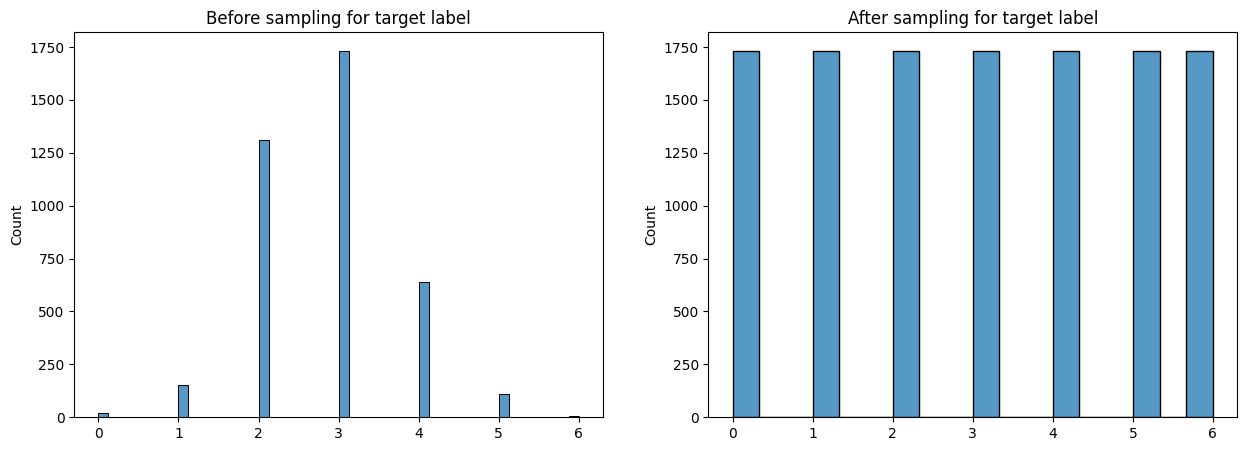

In [ ]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.histplot(y_train)
plt.title("Before sampling for target label")

fig.add_subplot(122)
sns.histplot(y_sm_sampling)
plt.title("After sampling for target label")

##### ADASYN

In [ ]:
ada = ADASYN(random_state=random_state, n_neighbors=3)
X_ada_sampling, y_ada_sampling = ada.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'After sampling for target label')

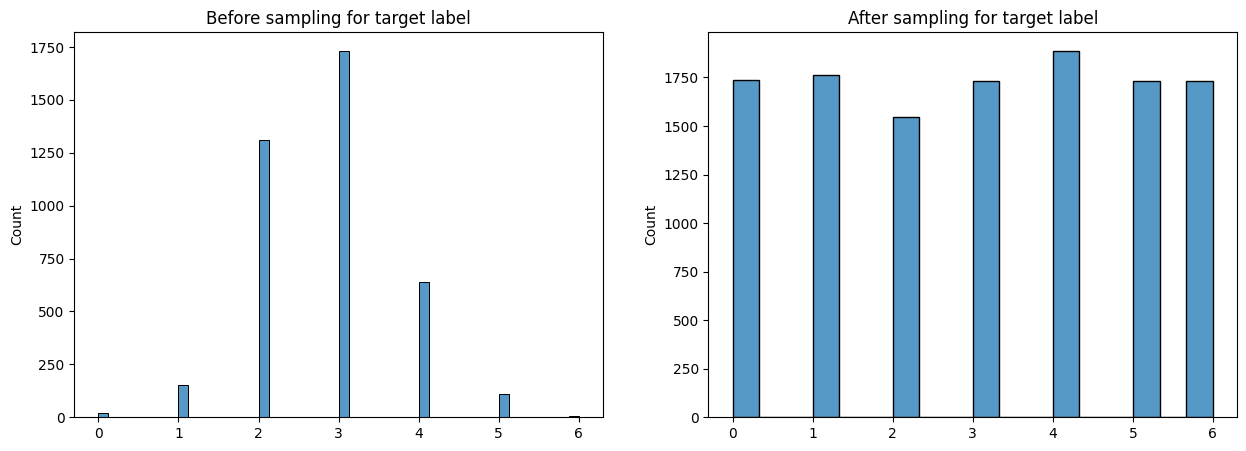

In [ ]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.histplot(y_train)
plt.title("Before sampling for target label")

fig.add_subplot(122)
sns.histplot(y_ada_sampling)
plt.title("After sampling for target label")